<a href="https://colab.research.google.com/github/Htetkkhine/MMDT_2025_MLAI101/blob/htet_kay_khine/htet_kay_khine/KNN_Classifier/Lab1_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

df=pd.read_csv('/content/fraud.csv', index_col = 0)

# Check your data and define X and y : What is X and what is y?
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values
df[['Class']].value_counts()

Class
0        21337
1          356
Name: count, dtype: int64

In [22]:
# perform train - test split. (40% as testing and 60% as training)
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size = 0.40,
                                    random_state=1)
# check the number of rows in the training and testing data

In [23]:
#--------------------------------------------------
## ----------- K-NN Classifier ------------------##
#--------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors = 5))]

knn_pipeline = Pipeline(steps)
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [25]:
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

k_values = [1, 3, 5, 7, 9, 11, 15]
results = []

for k in k_values:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_pred_proba = pipe.predict_proba(X_test)[:, 1]

    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_pred_proba)

    results.append({
        'k': k,
        'Recall_class1': report['1']['recall'],
        'Precision_class1': report['1']['precision'],
        'F1-score_class1': report['1']['f1-score'],
        'AUC': auc
    })

results_df = pd.DataFrame(results)
print(results_df)


    k  Recall_class1  Precision_class1  F1-score_class1       AUC
0   1       0.817518          0.835821         0.826568  0.907471
1   3       0.795620          0.973214         0.875502  0.915348
2   5       0.795620          0.973214         0.875502  0.918623
3   7       0.788321          0.972973         0.870968  0.925595
4   9       0.766423          0.972222         0.857143  0.925164
5  11       0.766423          0.972222         0.857143  0.924905
6  15       0.751825          0.971698         0.847737  0.931988


[[8538    3]
 [  28  109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8541
           1       0.97      0.80      0.88       137

    accuracy                           1.00      8678
   macro avg       0.98      0.90      0.94      8678
weighted avg       1.00      1.00      1.00      8678

0.9186226676477651


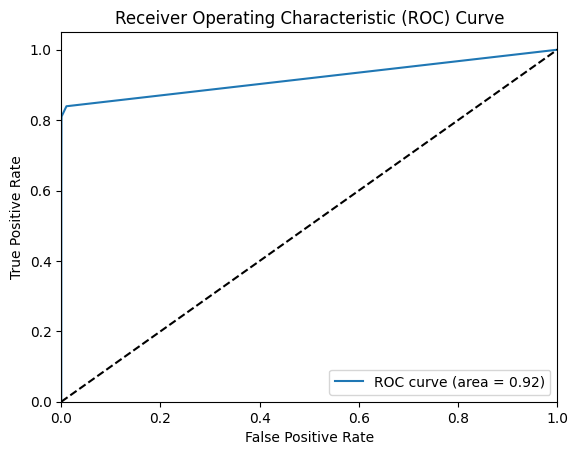

In [13]:
#--------------------------------------------------
## Model Evaluation ##
#--------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)


fpr, tpr, thresholds = roc_curve(y_test, ypred_testP[:,1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [15]:
ypred_train = knn_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = knn_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

[[12793     3]
 [   39   180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12796
           1       0.98      0.82      0.90       219

    accuracy                           1.00     13015
   macro avg       0.99      0.91      0.95     13015
weighted avg       1.00      1.00      1.00     13015

0.9992349207300798


In [16]:
import pandas as pd

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'th': thresholds})
df

fpr       tpr   th
0  0.000000  0.000000  inf
1  0.000117  0.613139  1.0
2  0.000351  0.773723  0.8
3  0.000351  0.795620  0.6
4  0.000585  0.810219  0.4
5  0.010420  0.839416  0.2
6  1.000000  1.000000  0.0

[[6398    3]
 [  22   85]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6401
           1       0.97      0.79      0.87       107

    accuracy                           1.00      6508
   macro avg       0.98      0.90      0.93      6508
weighted avg       1.00      1.00      1.00      6508

0.9287151394276887


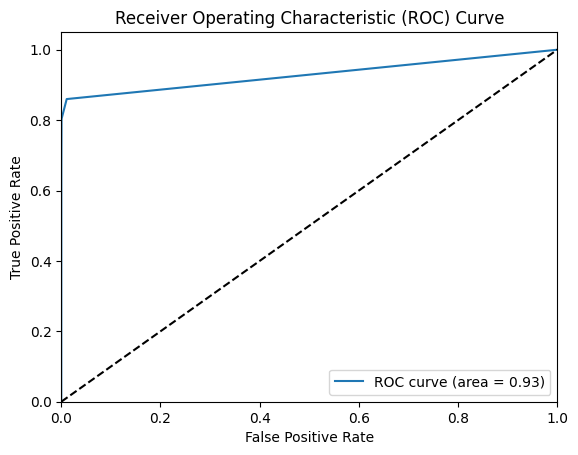

[[14933     3]
 [   44   205]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14936
           1       0.99      0.82      0.90       249

    accuracy                           1.00     15185
   macro avg       0.99      0.91      0.95     15185
weighted avg       1.00      1.00      1.00     15185

0.999288799547413


fpr       tpr   th
0  0.000000  0.000000  inf
1  0.000156  0.663551  1.0
2  0.000469  0.775701  0.8
3  0.000469  0.794393  0.6
4  0.000625  0.803738  0.4
5  0.010936  0.859813  0.2
6  1.000000  1.000000  0.0

In [18]:
# perform train - test split. (30% as testing and 70% as training)
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size = 0.30,
                                    random_state=1)
# check the number of rows in the training and testing data
knn_pipeline.fit(X_train, y_train)

ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)

fpr, tpr, thresholds = roc_curve(y_test, ypred_testP[:,1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ypred_train = knn_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = knn_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

import pandas as pd

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'th': thresholds})
df